Importing Words:

In [1]:
import random
from itertools import permutations
import numpy as np
from scipy.optimize import minimize
import scipy

In [2]:

scrabble_words = []

with open('words.txt') as wordsFile:
  for word in wordsFile:
    scrabble_words.append(word.strip('\n').upper())

print(scrabble_words[-100:-10])

# print(words)

['ZYGOCACTUS', 'ZYGOCACTUSES', 'ZYGOCARDIAC', 'ZYGODACTYL', 'ZYGODACTYLIC', 'ZYGODACTYLISM', 'ZYGODACTYLISMS', 'ZYGODACTYLOUS', 'ZYGODACTYLS', 'ZYGODONT', 'ZYGOID', 'ZYGOMA', 'ZYGOMAS', 'ZYGOMATA', 'ZYGOMATIC', 'ZYGOMATICS', 'ZYGOMORPHIC', 'ZYGOMORPHIES', 'ZYGOMORPHISM', 'ZYGOMORPHISMS', 'ZYGOMORPHOUS', 'ZYGOMORPHY', 'ZYGOMYCETE', 'ZYGOMYCETES', 'ZYGOMYCETOUS', 'ZYGON', 'ZYGOPHYLLACEOUS', 'ZYGOPHYTE', 'ZYGOPHYTES', 'ZYGOPLEURAL', 'ZYGOSE', 'ZYGOSES', 'ZYGOSIS', 'ZYGOSITIES', 'ZYGOSITY', 'ZYGOSPERM', 'ZYGOSPERMS', 'ZYGOSPHENE', 'ZYGOSPHENES', 'ZYGOSPORE', 'ZYGOSPORES', 'ZYGOSPORIC', 'ZYGOTE', 'ZYGOTENE', 'ZYGOTENES', 'ZYGOTES', 'ZYGOTIC', 'ZYGOTICALLY', 'ZYLONITE', 'ZYLONITES', 'ZYMASE', 'ZYMASES', 'ZYME', 'ZYMES', 'ZYMIC', 'ZYMITE', 'ZYMITES', 'ZYMOGEN', 'ZYMOGENE', 'ZYMOGENES', 'ZYMOGENESES', 'ZYMOGENESIS', 'ZYMOGENIC', 'ZYMOGENS', 'ZYMOGRAM', 'ZYMOGRAMS', 'ZYMOID', 'ZYMOLOGIC', 'ZYMOLOGICAL', 'ZYMOLOGIES', 'ZYMOLOGIST', 'ZYMOLOGISTS', 'ZYMOLOGY', 'ZYMOLYSES', 'ZYMOLYSIS', 'ZYMOLYTIC'

## Brute Force Method

In [ ]:


# Replace with the appropriate letter values in your Scrabble set
# LETTER_VALUES = {
#     'A': 1, 'B': 3, 'C': 3, 'D': 2, 'E': 1, 'F': 4, 'G': 2, 'H': 4,
#     'I': 1, 'J': 8, 'K': 5, 'L': 1, 'M': 3, 'N': 1, 'O': 1, 'P': 3,
#     'Q': 10, 'R': 1, 'S': 1, 'T': 1, 'U': 1, 'V': 4, 'W': 4, 'X': 8,
#     'Y': 4, 'Z': 10
# }

# def calculate_score(word):
#     return sum(LETTER_VALUES[letter] for letter in word.upper())

# def get_valid_words(letters):
#     valid_words = set()
#     for i in range(1, len(letters) + 1):
#         for perm in permutations(letters, i):
#             word = ''.join(perm)
#             if word.upper() in [word.upper() for word in words.words()]:
#                 valid_words.add(word)
#     return valid_words

# def get_best_scrabble_words(letters):
#     valid_words = get_valid_words(letters)
#     scored_words = [(word, calculate_score(word)) for word in valid_words]
#     sorted_words = sorted(scored_words, key=lambda x: x[1], reverse=True)
#     return sorted_words

# # Example usage
# rack_letters = 'EATOPL'
# best_words = get_best_scrabble_words(rack_letters)
# print(len(best_words))
# print("Best Scrabble words:", best_words[:10])  # Displaying the top 10 words
# print(len(words.words()))

In [3]:
class TrieNode:
    def __init__(self, letter, score, difficulty, is_end_of_word=False, word_score=0, word_difficulty=0, parent_id=None):
        self.letter = letter
        self.score = score
        self.difficulty = difficulty
        self.is_end_of_word = is_end_of_word
        self.word_score = word_score
        self.word_difficulty = word_difficulty
        self.parent_id = parent_id
        self.children = {}

class Trie:
    def __init__(self):
        self.nodes = []
        self.root = self.nodes[self._create_node(None, None, None, None, False, 0, 0)]

    def _create_node(self, letter, score, difficulty, parent_id, is_end_of_word, word_score, word_difficulty):
        node = TrieNode(letter, score, difficulty, is_end_of_word, word_score, word_difficulty, parent_id)
        self.nodes.append(node)
        return len(self.nodes) - 1  # Return the index of the newly created node

    def insert_word(self, word, scores, difficulties):
        current_node = self.root

        for i, letter in enumerate(word):
            score = scores[letter]
            difficulty = difficulties[letter]
            is_end_of_word = (i == len(word) - 1)

            if letter not in current_node.children:
                child_id = self._create_node(letter, score, difficulty, current_node, is_end_of_word, current_node.word_score + score, current_node.word_difficulty + difficulty)
                current_node.children[letter] = child_id
                current_node = self.nodes[child_id]
            else:
                child_id = current_node.children[letter]
                child_node = self.nodes[child_id]
                if is_end_of_word:
                    child_node.is_end_of_word = True

                current_node = child_node

    def search_word(self, word):
        current_node = self.root

        for letter in word:
            if letter in current_node.children:
                current_node = self.nodes[current_node.children[letter]]
            else:
                return None  # Word not found

        return current_node
    
    def find_valid_words(self, letters, minimum_word_length=2, must_contain='', coefficients = [0, 0]):
        valid_words = []
        maximum_score = [0]
        maximum_difficulty = [0]
        maximum_word = [""]
        

        def dfs(node, current_word, remaining_letters):
            if node.is_end_of_word and len(current_word) >= minimum_word_length:
                valid_words.append({
                    'word': current_word,
                    'score': node.word_score,
                    'difficulty': node.word_difficulty
                })
                # Check if the word has a higer score or the same score and a higher difficulty
                if node.word_score > maximum_score[-1] or (node.word_score == maximum_score[-1] and node.word_difficulty > maximum_difficulty[-1]):
                    maximum_score[-1] = node.word_score
                    maximum_difficulty[-1] = node.word_difficulty
                    maximum_word[-1] = current_word

            for letter, child_id in node.children.items():
                child_node = self.nodes[child_id]
                if letter in remaining_letters:
                    new_word = current_word + letter
                    new_remaining_letters = remaining_letters.replace(letter, "", 1)
                    dfs(child_node, new_word, new_remaining_letters)

        current_node = self.root
        for letter in letters:
            # print(letter)
            if letter in current_node.children:
                current_node = self.nodes[self.root.children[letter]]
                dfs(current_node, letter, letters.replace(letter, "", 1))
        
        # filter out words which do not contain the required letters and letters beyond
        if must_contain != '':
            valid_words = [
                {'word': valid_word['word'], 'score': valid_word['score'], 'difficulty': valid_word['difficulty']}
                for valid_word in valid_words
                if all(letter in valid_word['word'] for letter in must_contain)
            ]

        if len(valid_words) > 0:
            random.shuffle(valid_words)

        return valid_words, maximum_word[-1], maximum_score[-1], maximum_difficulty[-1]


# Example usage
LETTER_VALUES = {
    'A': 1, 'B': 3, 'C': 3, 'D': 2, 'E': 1, 'F': 4, 'G': 2, 'H': 4,
    'I': 1, 'J': 8, 'K': 5, 'L': 1, 'M': 3, 'N': 1, 'O': 1, 'P': 3,
    'Q': 10, 'R': 1, 'S': 1, 'T': 1, 'U': 1, 'V': 4, 'W': 4, 'X': 8,
    'Y': 4, 'Z': 10
}

# The relative difficulty needed to make words with each letter based on Joshua Lewis' Valett Model
LETTER_DIFFICULTIES = {
    'A': 1.2784810126582278,
    'B': 3.1772151898734178,
    'C': 2.4050632911392404,
    'D': 2.4430379746835444,
    'E': 1,
    'F': 3.8734177215189876,
    'G': 2.8227848101265822,
    'H': 3.1265822784810124,
    'I': 1.3037974683544304,
    'J': 7.227848101265823,
    'K': 4.417721518987341,
    'L': 1.8860759493670887,
    'M': 2.7468354430379747,
    'N': 1.6962025316455696,
    'O': 1.481012658227848,
    'P': 2.5822784810126582,
    'Q': 12.658227848101266,
    'R': 1.5569620253164558,
    'S': 1.2531645569620253,
    'T': 1.6582278481012658,
    'U': 2.3164556962025316,
    'V': 5.620253164556962,
    'W': 4.2784810126582276,
    'X': 6.734177215189874,
    'Y': 3.3797468354430378,
    'Z': 7.215189873417722
}

trie = Trie()

# Insert words into the trie
# words_to_insert = ['CAT', 'DOG', 'COT', 'DOT', 'COG', 'DOGS']
words_to_insert = scrabble_words
for word in words_to_insert:
    trie.insert_word(word, LETTER_VALUES, LETTER_DIFFICULTIES)

print(trie.root.children)
# # Search for a word in the trie
# search_word = 'DOG'
# result_node = trie.search_word(search_word)

# if result_node:
#     print(f"The word '{search_word}' is valid in Scrabble.")
#     print(f"Score for the word: {result_node.word_score}")
# else:
#     print(f"The word '{search_word}' is not valid in Scrabble.")

given_letters = 'CAISPRHV'
valid_words, maximum_word, maximum_score, maximum_difficulty  = trie.find_valid_words(given_letters)

# Display results
for word in valid_words:
    print(f"The word {word['word']} is valid in Scrabble with a score of {word['score']} and difficulty of {round(word['difficulty'], 2)}.")

print(len(valid_words))

print(f"The maximum score is {maximum_score}, using the word {maximum_word} with a difficulty of {round(maximum_difficulty, 2)}.")


{'A': 1, 'B': 37042, 'C': 68564, 'D': 121673, 'E': 157414, 'F': 182749, 'G': 204923, 'H': 224213, 'I': 247594, 'J': 271049, 'K': 275686, 'L': 282518, 'M': 299287, 'N': 333814, 'O': 350964, 'P': 371135, 'Q': 424843, 'R': 427775, 'S': 459071, 'T': 526493, 'U': 557328, 'V': 584905, 'W': 594632, 'X': 606742, 'Y': 607518, 'Z': 609469}
The word PHIS is valid in Scrabble with a score of 9 and difficulty of 8.27.
The word ICHS is valid in Scrabble with a score of 9 and difficulty of 8.09.
The word CARP is valid in Scrabble with a score of 8 and difficulty of 7.82.
The word ASPIC is valid in Scrabble with a score of 9 and difficulty of 8.82.
The word SCHAV is valid in Scrabble with a score of 13 and difficulty of 13.68.
The word PICRA is valid in Scrabble with a score of 9 and difficulty of 9.13.
The word PARIS is valid in Scrabble with a score of 7 and difficulty of 7.97.
The word PICRAS is valid in Scrabble with a score of 10 and difficulty of 10.38.
The word HASP is valid in Scrabble with a 

In [4]:
class ScrabbleGame:
    def __init__(self):
        # Define the initial set of letters in the pool
        self.letter_pool = {
            'A': 9, 'B': 2, 'C': 2, 'D': 4, 'E': 12, 'F': 2, 'G': 3, 'H': 2,
            'I': 9, 'J': 1, 'K': 1, 'L': 4, 'M': 2, 'N': 6, 'O': 8, 'P': 2,
            'Q': 1, 'R': 6, 'S': 4, 'T': 6, 'U': 4, 'V': 2, 'W': 2, 'X': 1,
            'Y': 2, 'Z': 1
        }

        # self.word_bank = [""]

        self.player_pool = []
        self.player_info = {}
        self.continue_game = True

    def register_player(self, player_id, intelligence_factor):
        self.player_info[player_id] = {
            "intelligence_factor": intelligence_factor,
            "word_bank": []
        }

    def select_player_random_intelligence_weighted(self):
        return random.choices(list(self.player_info.keys()), weights=[p["intelligence_factor"] for p in self.player_info.values()])[0]
    
    def select_player(self):
        return self.select_player_random_intelligence_weighted()

    def display_rack(self):
        # print("Your current rack:", self.player_pool)
        return

    def all_words(self):
        return np.concatenate([p["word_bank"] for p in self.player_info.values()])

    def display_pool(self):
        return
        # print("Letters remaining in the pool:")
        # print(self.letter_pool)
    
    def display_word_bank(self, player_id=None):
        return
        # print("Words played so far:")
        # for p, info in self.player_info.items():
        #     # print(f"Player {p}: {info['word_bank']}")
        # if player_id is not None:
        #     # print("Your current word bank:")
        #     # print(self.player_info[player_id]["word_bank"])
        

    def calculate_score(_self, word):
        return sum(LETTER_VALUES[letter] for letter in word.upper())

    def output_score(self, player_id=None):
        return
        # # print("Total score across all players:", sum(self.calculate_score(word) for word in self.all_words()))
        # # print("Score per player")
        # for player_id, info in self.player_info.items():
        #     # print(f"Player {player_id}: {sum(self.calculate_score(word) for word in info['word_bank'])}")
        # if player_id is not None:
        #     # print("Your current score:", sum(self.calculate_score(word) for word in self.player_info[player_id]["word_bank"]))

    def return_player_score(self, player_id):
        return sum(self.calculate_score(word) for word in self.player_info[player_id]["word_bank"])
    
    def find_optimal_words_to_play(self, player_id=None, coefficients=[1, 0.0001]):
        playable_options = []
        for player, info in self.player_info.items():
            for word in info['word_bank']:

                # print("CHECKING WORD: ", word + ''.join(self.player_pool))
                valid_words, maximum_word, maximum_score, maximum_difficulty = trie.find_valid_words(word + ''.join(self.player_pool), max(3, len(word) + 1), word)
                for valid_word in valid_words:
                    # Take only the score of the added letters if the word is already owned by this player
                    turn_score = valid_word['score'] - self.calculate_score(word) if player_id == player else valid_word['score']

                    playable_options.append({
                        "word": valid_word['word'],
                        "turn_score": turn_score,
                        "difficulty": valid_word['difficulty'],
                        "obj": np.dot([turn_score, valid_word['difficulty']], coefficients), # modify as necessary
                        "formed_from": word,
                        'owned_by': player
                    })
        
        for valid_word in trie.find_valid_words('' + ''.join(self.player_pool), max(3, 0 + 1), '')[0]:
            playable_options.append({
                "word": valid_word['word'],
                "turn_score": valid_word['score'],
                "difficulty": valid_word['difficulty'],
                "obj": np.dot([valid_word['score'], valid_word['difficulty']], coefficients), # modify as necessary
                "formed_from": '',
                'owned_by': ''
            })
        
        playable_options = sorted(playable_options, key=lambda x: x["obj"], reverse=True)

        # print("The optimal words to play are:")
        # print(playable_options)
        return playable_options
        
            

    def draw_letters(self, num_letters):
        if (len(self.letter_pool) == 0):
            # print("Error: No letters left in the pool.")
            self.continue_game = False
            return []
        if num_letters > sum(self.letter_pool.values()):
            # print("Error: Not enough letters in the pool.")
            num_letters = sum(self.letter_pool.values())

        drawn_letters = []
        for letter in range(num_letters):
            drawn_letter = random.choices(list(self.letter_pool.keys()), weights=(self.letter_pool.values()), k=1)[0]
            drawn_letters.append(drawn_letter)
            self.player_pool.append(drawn_letter)
            self.letter_pool[drawn_letter] -= 1
            if self.letter_pool[drawn_letter] == 0:
                del self.letter_pool[drawn_letter]

        return drawn_letters

    def play_word(self, word, player_id, stolen_from='', formed_from=''):
        if (formed_from != '') != (stolen_from != ''):
            # print("Error: Must specify both 'stolen_from' and 'formed_from' or neither.")
            return False
        if player_id not in self.player_info:
            # print("Error: Player ID not registered.")
            return False
        if stolen_from != '' and stolen_from not in self.player_info:
            # print("Error: Player ID to steal from not registered.")
            return False
        if word == "":
            # print("Skipping turn.")
            return True
        if word.upper() == "!EXIT":
            self.continue_game = False
            return True
        if formed_from != '' and formed_from not in self.player_info[stolen_from]["word_bank"]:
            # print(f"Error: '{formed_from}' is not in {stolen_from} word bank.")
            return False
        

        word_upper = word.upper()
        letters_to_remove = []
        word_to_remove = formed_from
        for letter in word_upper:

            if letter not in self.player_pool and letter not in formed_from:
                # print(f"Error: '{letter}' is not in your rack.")
                return False
            if letter in formed_from:
                formed_from = formed_from.replace(letter, '', 1)
            elif letter not in self.player_pool:
                # print(f"Error: '{letter}' is not in your rack.")
                return False
            else:
                letters_to_remove.append(letter)

        if formed_from != '':
            # print(f"Error: Letters from '{word_to_remove}' not in '{word}'. Missing letters: '{formed_from}'")
            return False
        if len(letters_to_remove) == 0:
            # print(f"Error: '{word}' must contain at least one new letter.")
            return False
        
        for letter in letters_to_remove:
            self.player_pool.remove(letter)
        if word_to_remove != '':
            self.player_info[stolen_from]["word_bank"].remove(word_to_remove)
        self.player_info[player_id]["word_bank"].append(word_upper)
        # print(f"Success! '{word_upper}' played.")
        return True




In [5]:
class PlayerAgent:
    def __init__(self, id, scrabble_game, intelligence_factor=1, coefficients=[1, 0.0001]):
        self.scrabble_game = scrabble_game
        self.id = id
        self.intelligence_factor = intelligence_factor
        self.coefficients = coefficients
        

    def play_turn(self):
        self.scrabble_game.draw_letters(7)
        self.scrabble_game.display_rack()
        self.scrabble_game.display_pool()
        self.scrabble_game.display_word_bank()
        self.scrabble_game.find_optimal_words_to_play()

        optimal_words = self.scrabble_game.find_optimal_words_to_play(coefficients = self.coefficients)
        if not optimal_words:
            # print("No optimal words to play. Skipping turn.")
            return

        successfully_executed_turn = False
        attempts = 0

        while not successfully_executed_turn and attempts < len(optimal_words):
            best_word = optimal_words[attempts]["word"]
            formed_from = optimal_words[attempts]["formed_from"]
            stolen_from = optimal_words[attempts]["owned_by"]

            successfully_executed_turn = self.scrabble_game.play_word(best_word.upper(), self.id, stolen_from, formed_from.upper())
            attempts += 1

        if not successfully_executed_turn:
            # print("No optimal words to play. Skipping turn.")
            return

        self.scrabble_game.output_score()

scrabble_game = ScrabbleGame()
player_agents = {
    "player1": PlayerAgent("player1", scrabble_game, 1, [0, 0]),
    "player2": PlayerAgent("player2", scrabble_game, 1, [0, 0]),
    "player3": PlayerAgent("player3", scrabble_game, 1, [0, 0]),
}
for player_id, player_agent in player_agents.items():
    scrabble_game.register_player(player_id, player_agent.intelligence_factor)

# Draw initial letters for the player
scrabble_game.draw_letters(7)

while scrabble_game.continue_game:
    player_id = scrabble_game.select_player()
    player_agent = player_agents[player_id]
    player_agent.play_turn()

print("Game over.")
scrabble_game.output_score()


Game over.


In [ ]:
# Example usage:
scrabble_game = ScrabbleGame()

scrabble_game.draw_letters(2)
while scrabble_game.continue_game:
    scrabble_game.draw_letters(1)
    scrabble_game.display_rack()
    scrabble_game.display_pool()
    scrabble_game.display_word_bank()
    scrabble_game.find_optimal_words_to_play()
    successfully_executed_turn = False
    while not successfully_executed_turn:
        word_to_play = input("Enter a word to play: ")
        formed_from = input("Enter the word formed from (leave blank if word is entirely from pool): ")
        successfully_executed_turn = scrabble_game.play_word(word_to_play.upper(), formed_from.upper())
    scrabble_game.output_score()

In [ ]:
# Figuring out statistical significance

# How many games to simulate
number_of_games = 5

# Make a score sum for each constant variation
player1_scores = np.zeros(number_of_games)
player2_scores = np.zeros(number_of_games)

for game_number in range(number_of_games):

    scrabble_game = ScrabbleGame()
    player_agents = {
        "player1": PlayerAgent("player1", scrabble_game, 1, [1, 0]),#Player 1 picks the highest score word each turn
        "player2": PlayerAgent("player2", scrabble_game, 1, [0, 0]) #Player 2 picks a random valid word each turn
    }
    for player_id, player_agent in player_agents.items():
        scrabble_game.register_player(player_id, player_agent.intelligence_factor)

    # Draw initial letters for the player
    scrabble_game.draw_letters(7)

    while scrabble_game.continue_game:
        player_id = scrabble_game.select_player()
        player_agent = player_agents[player_id]
        player_agent.play_turn()

    player1_scores[game_number] = scrabble_game.return_player_score("player1")
    player2_scores[game_number] = scrabble_game.return_player_score("player2")


score_averages_player1 = np.mean(player1_scores)
score_stddev_player1 = np.std(player1_scores)

score_averages_player2 = np.mean(player2_scores)
score_stddev_player2 = np.std(player2_scores)



statistic, pvalue = scipy.stats.ttest_ind_from_stats(
    score_averages_player1, 
    score_stddev_player1, 
    len(player1_scores), 
    score_averages_player2, 
    score_stddev_player2, 
    len(player2_scores)
)

print('Statistic: ', statistic)
print('P-Value: ', pvalue)


print('Player1 Average: ', score_averages_player1)
print('Player1 StdDev: ', score_stddev_player1)
print('Player2 Average: ', score_averages_player2)
print('Player2 StdDev: ', score_stddev_player2)



In [ ]:
# def objective(coefficients):
#     player_agents["player1"].coefficients = coefficients
#     total_score = 0
#     for _ in range(num_games):  # You might want to play multiple games to get more reliable results
#         scrabble_game.reset()   # Reset the game for each iteration
#         total_score += player_agents["player1"].play()
#     return -total_score / num_games  # Minimize the negative average score


def objective(coefficients):
    # How many games to simulate
    number_of_games = 5

    # Make a score sum for each constant variation
    player1_scores = np.zeros(number_of_games)
    player2_scores = np.zeros(number_of_games)

    for game_number in range(number_of_games):

        scrabble_game = ScrabbleGame()
        player_agents = {
            "player1": PlayerAgent("player1", scrabble_game, 1, coefficients),#Player 1 picks the highest score word each turn
            "player2": PlayerAgent("player2", scrabble_game, 1, [0, 0]) #Player 2 picks a random valid word each turn
        }
        for player_id, player_agent in player_agents.items():
            scrabble_game.register_player(player_id, player_agent.intelligence_factor)

        # Draw initial letters for the player
        scrabble_game.draw_letters(7)

        while scrabble_game.continue_game:
            player_id = scrabble_game.select_player()
            player_agent = player_agents[player_id]
            player_agent.play_turn()

        player1_scores[game_number] = scrabble_game.return_player_score("player1")
        player2_scores[game_number] = scrabble_game.return_player_score("player2")


    score_averages_player1 = np.mean(player1_scores)
    score_averages_player2 = np.mean(player2_scores)

    return -score_averages_player1

# Initial guess for coefficients
initial_coefficients = np.array([1.0, 1.0])

# Optimization settings
result = minimize(objective, initial_coefficients, method='Nelder-Mead', bounds=[(0,1),(0,1)])

# Extract the optimal coefficients
optimal_coefficients = result.x

# Set the optimal coefficients for player1
player_agents["player1"].coefficients = optimal_coefficients

# Print the optimal coefficients and the corresponding maximum score
print("Optimal Coefficients:", optimal_coefficients)
print("Maximum Score:", -result.fun)



Optimal Coefficients: [0.001, 0.0630957344480193]
Maximum Score: 129.1
The result matrix is: 
[[111.9 111.3 103.4 116.1 111.4 124.5]
 [107.7 108.5 110.5 105.5 116.6  95.4]
 [108.7  90.6 105.6  95.5  93.3 125. ]
 [129.1 124.2  95.7 117.4 110.2 111.2]
 [114.  113.5 117.  118.8 107.9  91.1]
 [118.8 112.7 109.  107.3 113.8  90. ]]


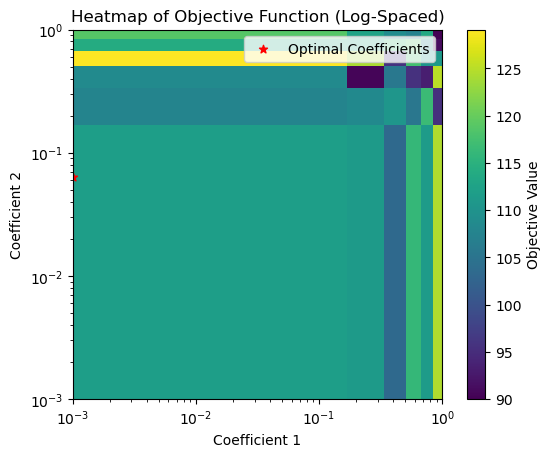

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def objective(coefficients):
    # How many games to simulate
    number_of_games = 10

    # Make a score sum for each constant variation
    player1_scores = np.zeros(number_of_games)
    player2_scores = np.zeros(number_of_games)

    for game_number in range(number_of_games):

        scrabble_game = ScrabbleGame()
        player_agents = {
            "player1": PlayerAgent("player1", scrabble_game, 1, coefficients),#Player 1 picks the highest score word each turn
            "player2": PlayerAgent("player2", scrabble_game, 1, [0, 0]) #Player 2 picks a random valid word each turn
        }
        for player_id, player_agent in player_agents.items():
            scrabble_game.register_player(player_id, player_agent.intelligence_factor)

        # Draw initial letters for the player
        scrabble_game.draw_letters(7)

        while scrabble_game.continue_game:
            player_id = scrabble_game.select_player()
            player_agent = player_agents[player_id]
            player_agent.play_turn()

        player1_scores[game_number] = scrabble_game.return_player_score("player1")
        player2_scores[game_number] = scrabble_game.return_player_score("player2")


    score_averages_player1 = np.mean(player1_scores)
    score_averages_player2 = np.mean(player2_scores)

    return score_averages_player1

# Generate log-spaced values for the coefficients
coefficients_range = np.logspace(-3, 0, num=6, endpoint=True, base=10.0)

# Create a log-spaced meshgrid
coefficients_meshgrid = np.meshgrid(coefficients_range, coefficients_range)

# Initialize a matrix to store results
result_matrix = np.zeros((6, 6))

# Iterate through coefficients using two for loops
for i in range(6):
    for j in range(6):
        # Calculate the result based on the current coefficients
        coefficients = [coefficients_meshgrid[0][i, j], coefficients_meshgrid[1][i, j]]
        # coefficients = [i*0.2, j*0.2]
        result = objective(coefficients)

        # Store the result in the matrix
        result_matrix[i, j] = result

# Find the indices of the maximum value in the result matrix
max_indices = np.unravel_index(result_matrix.argmax(), result_matrix.shape)

# Extract the optimal coefficients from the matrix indices
optimal_coefficients = [coefficients_meshgrid[0][max_indices], coefficients_meshgrid[1][max_indices]]

# Print the optimal coefficients and the corresponding maximum score
print("Optimal Coefficients:", optimal_coefficients)
print("Maximum Score:", result_matrix.max())
print("The result matrix is: ")
print(result_matrix)

# Plot the heatmap
plt.imshow(result_matrix, cmap='viridis', origin='lower', extent=[coefficients_range[0], coefficients_range[-1], coefficients_range[0], coefficients_range[-1]])
plt.colorbar(label='Objective Value')
plt.title('Heatmap of Objective Function (Log-Spaced)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Coefficient 1')
plt.ylabel('Coefficient 2')
plt.scatter(optimal_coefficients[0], optimal_coefficients[1], marker='*', color='red', label='Optimal Coefficients')
plt.legend()
plt.show()

Optimal Coefficients: [0.001, 0.0630957344480193]
Maximum Score: 129.1
The result matrix is: 
[[111.9 111.3 103.4 116.1 111.4 124.5]
 [107.7 108.5 110.5 105.5 116.6  95.4]
 [108.7  90.6 105.6  95.5  93.3 125. ]
 [129.1 124.2  95.7 117.4 110.2 111.2]
 [114.  113.5 117.  118.8 107.9  91.1]
 [118.8 112.7 109.  107.3 113.8  90. ]]


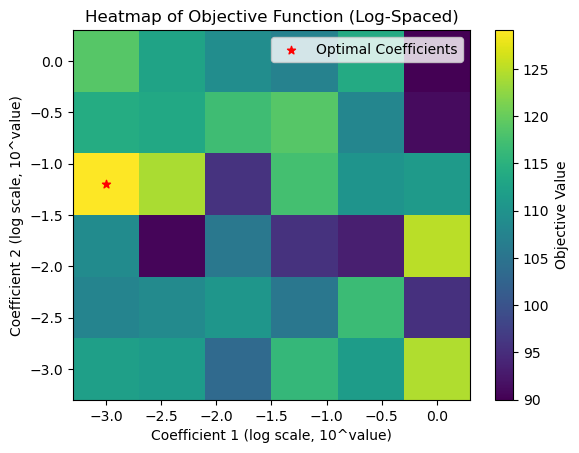

In [13]:
# Find the indices of the maximum value in the result matrix
max_indices = np.unravel_index(result_matrix.argmax(), result_matrix.shape)

# Extract the optimal coefficients from the matrix indices
optimal_coefficients = [coefficients_meshgrid[0][max_indices], coefficients_meshgrid[1][max_indices]]

# Print the optimal coefficients and the corresponding maximum score
print("Optimal Coefficients:", optimal_coefficients)
print("Maximum Score:", result_matrix.max())
print("The result matrix is: ")
print(result_matrix)

# Plot the heatmap with pcolormesh
plt.pcolormesh(np.log10(coefficients_meshgrid[0]), np.log10(coefficients_meshgrid[1]), result_matrix, cmap='viridis')
plt.colorbar(label='Objective Value')
plt.title('Heatmap of Objective Function (Log-Spaced)')
plt.xlabel('Coefficient 1 (log scale, 10^value)')
plt.ylabel('Coefficient 2 (log scale, 10^value)')
plt.scatter(np.log10(optimal_coefficients[0]), np.log10(optimal_coefficients[1]), marker='*', color='red', label='Optimal Coefficients')
plt.legend()
plt.show()